In [1]:
from ete3 import Tree

# Loads a tree structure from a newick string. The returned variable ’t’ is the root node for the tree.
t = Tree("((D,F)E,(B,H)A)C;",format=8 )

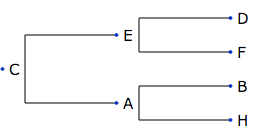

In [2]:
from ete3 import Tree, TreeStyle, TextFace, add_face_to_node

ts = TreeStyle()
ts.show_leaf_name = False
ts.show_scale = False
ts.branch_vertical_margin = 15
def my_layout(node):
    F = TextFace(" " + node.name + " ", tight_text=False,fsize=15)
    add_face_to_node(F, node, column=0, position="branch-right")
ts.layout_fn = my_layout
t.render("%%inline", tree_style=ts)

In [3]:
class Node:
    def __init__(self,val):
        self.data = val
        self.children = []
        
    def add_child(self,val):
        self.children.append(Node(val))
        return self.children[len(self.children)-1]

In [4]:
racine = Node('A')
b = racine.add_child('B')
c = racine.add_child('C')
d = racine.add_child('D')
e = racine.add_child('E')
f = b.add_child('F')
g = b.add_child('G')
h = d.add_child('H')
i = e.add_child('I')
j = e.add_child('J')
k = e.add_child('K')

In [5]:
def newick8_from_generic_tree(R):
    s = ""
    if R:
        if len(R.children) > 0:
            s += "("
            for i,r in enumerate(R.children):
                if i > 0:
                    s += ","
                s += newick8_from_generic_tree(r)
            s += ")"
        s += "{0}".format(R.data)
    return s

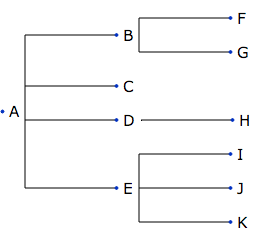

In [6]:
t = Tree(newick8_from_generic_tree(racine)+";",format=8)
t.render("%%inline", tree_style=ts)

In [7]:
def newick8_from_binary_tree(R):
    s = ""
    if R:
        s += "("
        s += newick8_from_binary_tree(R.gauche)
        s += ","
        s += newick8_from_binary_tree(R.droite)
        s += ")"
        s += "{0}".format(R.data)
    else:
        s += "⌀"
    return s

(((⌀,⌀)D,(⌀,⌀)E)B,((⌀,⌀)F,⌀)C)A;


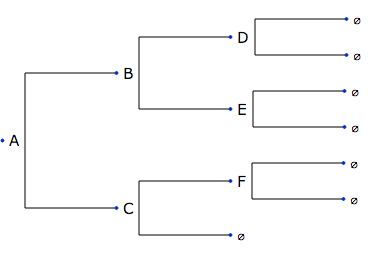

In [8]:
class Node:
    def __init__(self,val):
        self.data = val
        self.gauche = None
        self.droite = None
        
racine  = a = Node('A')
a.gauche  = b = Node('B')
a.droite = c = Node('C')
b.gauche  = d = Node('D')
b.droite = e = Node('E')
c.gauche  = f = Node('F')

n = newick8_from_binary_tree(racine)+";"
print(n)
t = Tree(n,format=8)
t.render("%%inline", tree_style=ts)

In [11]:
def afficher_arbre_binaire(R):
    n = newick8_from_binary_tree(R)+";"
    t = Tree(n,format=8)
    return t.render("%%inline", tree_style=ts)

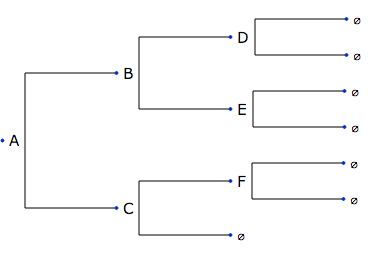

In [12]:
afficher_arbre_binaire(racine)